# Movie Recommendations System

Author: Dolgor Purbueva

## Project Overview

The goal of this project is to develop a movie recommendation system leveraging the MovieLens dataset, which includes user ratings, tags and movies data. The system aims to enhance user experience by providing personalized movie suggestions based on user preferences and viewing history.

The project will utilize machine learning algorithms to predict user ratings for movies that they have not yet watched. These predictions will be based on the analysis of historical data from a data set of users and movies. Key features of the dataset include user IDs, movie IDs, ratings, genres, tags and release years. The primary metric for evaluating the effectiveness of the recommendation system will be the Root Mean Square Error (RMSE) and Mean Absolute Error (MAE), which will help in assessing the accuracy of the predictions.

The development process will involve data cleaning and data preprocessing to handle missing values and bring data to a comvinient format, feature engineering to tranform necessaary data, exploratory data analysis to understand underlying patterns, and the implementation of several recommendation algorithms such as collaborative filtering, content-based filtering, and hybrid methods. The performance of these models will be compared to select the most effective approach.

The outcome of this project is expected to not only provide a practical application of advanced data science techniques but also to significantly improve the engagement and satisfaction of users by tailoring movie recommendations to their unique tastes.

![Alt text](images/image.png)

## Business Understanding

In the increasingly competitive entertainment industry, delivering personalized content to users is crucial for maintaining user engagement and satisfaction. A tailored movie recommendation system serves this need by helping users discover movies that align with their preferences, thereby increasing the likelihood of prolonged platform usage and customer retention.

Objective:
The primary objective of this project is to develop a movie recommendation system for a streaming platform that aims to improve user experience by providing personalized movie suggestions. This system will help the platform stand out in a crowded market by enhancing user engagement through accurately predicted recommendations.

Business Impact:
Implementing an effective movie recommendation system will directly impact several key business metrics:

![Alt text](images/image3.jpg)

## Stakeholder

Tubi is a free ad-supported streaming service. Company wants to improve user engagement and retention by providing personalized movie recommendations based on user preferences and viewing history.

**How can Tubi benefit:**

* Increased User Engagement: Personalized recommendations can help users find movies they are more likely to enjoy, leading to longer viewing times and increased interaction with the platform.
* Enhanced User Experience: By offering tailored movie suggestions, Tubi can improve overall user satisfaction, making the platform more attractive to new and existing users.
* Higher Ad Revenue: More engagement and longer viewing times can lead to increased ad impressions and higher ad revenue for Tubi.

**Expected Outcomes:**
* Increased Viewing Time: Users spend more time on Tubi, watching recommended movies.
* Higher User Retention: Improved satisfaction leads to higher retention rates and reduced churn.
* Enhanced Revenue: More engagement results in increased ad impressions and revenue.

## Business Questions

* How can machine learning be used by online movie streaming services for movie recommendations to users?
* What ML model make best movie predicitons for users?

## Objectives

* Develop several recommendation models: collaborative filtering, content based filtering, hybrid
* Achieve high prediction accuracy
* compare and evaluate algorithms:
* Suggest solution for cold start problem
* Suggest details how users will interact with the system
* Provide business recommendation for the stakeholder

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for SVD
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds

#surprise
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import knns
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy

from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise import Reader, Dataset

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Data Understanding

Chosen dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. 

* It contains 100836 ratings and 3683 tag applications across 9742 movies. 
* These data were created by 610 users between March 29, 1996 and September 24, 2018. 
* This dataset was generated on September 26, 2018.

The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. To understand data better lets take a look at what we have in each file:

**rating:**
Shape - 100836 rows × 4 columns
Columns - userid, movieid, rating, timestamp


**movies:**
Shape - 9742 rows × 3 columns
Columns - movieid, title, genre

**tags:**
Shape - 3683 rows × 4 columns
Columns - userId, movieId, tag, timestamp

**links:**
Shape - 9742 rows × 3 columns
Columns - movieId, imdbId, tmdbId

![Alt text](images/image5.png)

MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between `ratings.csv` and `tags.csv` (i.e., the same id refers to the same user across the two files).


Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id `1` corresponds to the URL <https://movielens.org/movies/1>). Movie ids are consistent between `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv` (i.e., the same id refers to the same movie across these four data files).


## EDA

Let's load the data set and see what further processing is required. We will merge data sets If needed depending on the goal.

In [154]:
ratings= pd.read_csv('data/ratings.csv')

movies = pd.read_csv('data/movies.csv')

tags = pd.read_csv('data/tags.csv')

links =pd.read_csv('data/links.csv')

### Ratings data set:

* The data set has 100836 rows and 4 columns. Columns are: userid, movieid, rating, timestamp. 

* Rating column has a float data type, the rest are integers. 

* No missing values across all rows.

* Each line of this data set represents one rating of one movie by one user.  

* Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

* Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [155]:
print(ratings.shape)
ratings.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [156]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [157]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### Movies data set

The data set has 9742 rows and 3 columns. Columns are movieid, title, genres. Movieid column is integer data type, title and genres are objects. No missing values.

Each line of this data set represents one movie. Movie titles include the year of release in parentheses.

Genres are a pipe-separated list, and are selected from the following:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western

In [158]:
print(movies.shape)
movies.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [159]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


### Tags data set

The data set has 3683 rows and 4 columns. Columns are userid, movieid, tag, timestamp. Userid, movieid and timstamp columns are integer data type, tag column is object data type. No missing values.

Each line of this data set represents one tag applied to one movie by one user.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [160]:
print(tags.shape)
tags.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [161]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [297]:
len(tags['userId'].value_counts())

58

### Links data set

The data set has 9742 rows and 3 columns. Columns are movieid, imdbid, tmdbid. Movieid and imdbid columns are integer data type, tmdbid is float data type. Some missingness (8 rows) is in the tmdbid column.

Each line of this file after the header row represents one movie.

movieId is an identifier for movies used by <https://movielens.org>. E.g., the movie Toy Story has the link <https://movielens.org/movies/1>.

imdbId is an identifier for movies used by <http://www.imdb.com>. E.g., the movie Toy Story has the link <http://www.imdb.com/title/tt0114709/>.

tmdbId is an identifier for movies used by <https://www.themoviedb.org>. E.g., the movie Toy Story has the link <https://www.themoviedb.org/movie/862>.

In [162]:
print(links.shape)
links.head()

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [163]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


## EDA

We will look at each data set separately first and analysze the nature of the data and what insights it can give to us.

* We can see that have 610 uniqe users that rated movies
* 9724 unqie movies rated
* we check contents of column with unqie value to see of there are any place holders
* lets transform the timestamp to a date format in case it might useful later

In [164]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [165]:
ratings.value_counts('userId')

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
569      20
194      20
147      20
406      20
442      20
Length: 610, dtype: int64

In [166]:
ratings.value_counts('movieId')

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
57502       1
57522       1
57526       1
4032        1
193609      1
Length: 9724, dtype: int64

In [167]:
ratings.value_counts('rating')

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
dtype: int64

In [168]:
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')

ratings['rate_year'] = ratings['date'].dt.year

In [169]:
ratings.head()

,userId,movieId,rating,timestamp,date,rate_year
0,1,1,4.0,964982703,2000-07-30 18:45:03,2000
1,1,3,4.0,964981247,2000-07-30 18:20:47,2000
2,1,6,4.0,964982224,2000-07-30 18:37:04,2000
3,1,47,5.0,964983815,2000-07-30 19:03:35,2000
4,1,50,5.0,964982931,2000-07-30 18:48:51,2000


We now have a data set with a year column when the rating was submitted. Let's drop timestamp and date columns as we dont need them anymore in EDA

In [170]:
ratings = ratings.drop(columns=['timestamp', 'date'])

In [171]:
ratings.head()

,userId,movieId,rating,rate_year
0,1,1,4.0,2000
1,1,3,4.0,2000
2,1,6,4.0,2000
3,1,47,5.0,2000
4,1,50,5.0,2000


Let's do some visualisations of the data

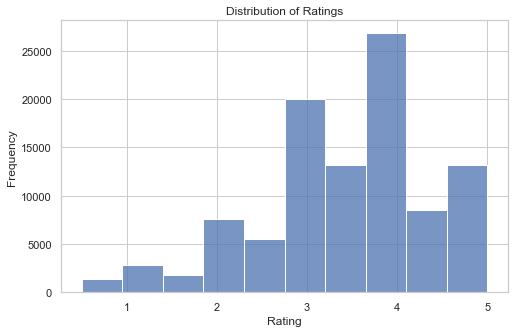

In [292]:
plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

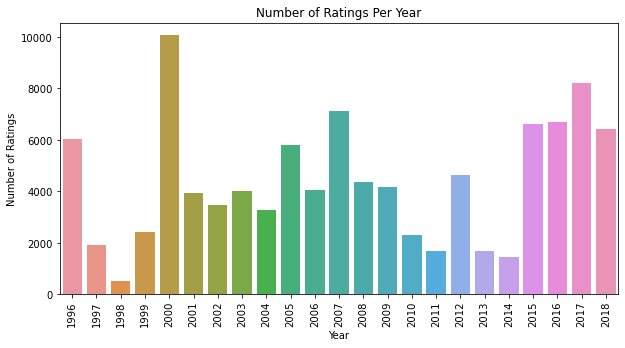

In [173]:
plt.figure(figsize=(10, 5))
sns.countplot(x='rate_year', data=ratings)
plt.title('Number of Ratings Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

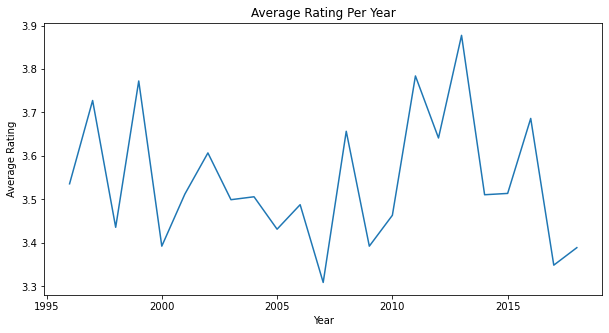

In [174]:
avg_rating_per_year = ratings.groupby('rate_year')['rating'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_rating_per_year.index, y=avg_rating_per_year.values)
plt.title('Average Rating Per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

Objective: Understand user engagement by seeing how many ratings each user gives.

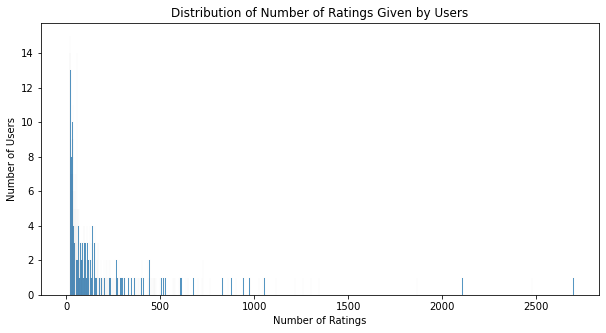

In [175]:
user_ratings_count = ratings['userId'].value_counts().reset_index()
user_ratings_count.columns = ['userId', 'num_ratings']

# Plot the distribution of the number of ratings given by users
plt.figure(figsize=(10, 5))
sns.histplot(user_ratings_count['num_ratings'], bins=range(1, user_ratings_count['num_ratings'].max() + 2), kde=False)
plt.title('Distribution of Number of Ratings Given by Users')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

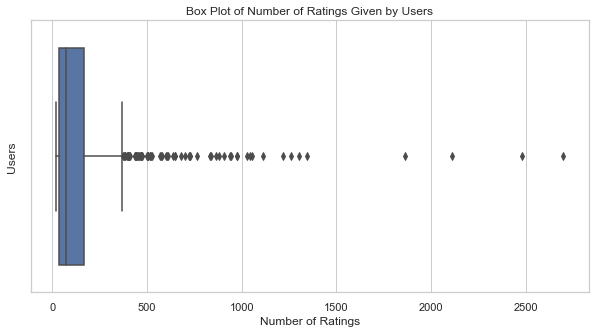

In [290]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=user_ratings_count['num_ratings'])
plt.title('Box Plot of Number of Ratings Given by Users')
plt.xlabel('Number of Ratings')
plt.ylabel('Users')
plt.show()

## MOVIES data set exploration

Lets take a closer look at the 'movies' data set. We have three columns, title column has release year in after the movie name. Genres are listed separated with | and they are all one string, one movie has one to 5 genres listed.

We will retrive the release year into a separate column for future EDA, we will try to split genres.

In [177]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


We need to check for duplicates first

In [178]:
movies.duplicated('movieId').sum()

0

We extract release year from the movie title into a separate column

In [179]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')

In [180]:
movies['title'] = movies['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

In [181]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


Let's explore the genre column. We will separate all genres and explode all of them into a separate line for the EDA. We want to take a look at what genres are most popular and best rated.

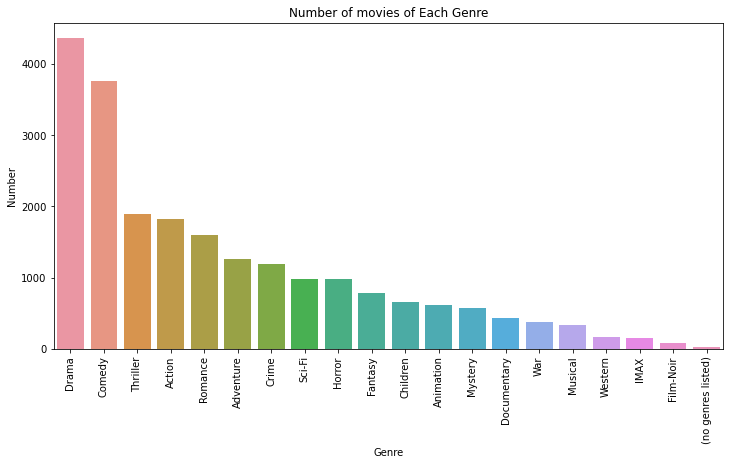

In [182]:
#create a copy
movies_genres = movies.copy()

#split the string
movies_genres['genres'] = movies_genres['genres'].str.split('|') 

#separate all genres into their own row
movies_genres = movies_genres.explode('genres')

genre_count = movies_genres['genres'].value_counts()

#plot number of movies by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count.index, y=genre_count.values) 
plt.title('Number of movies of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.show()

We create a new df with merged movies (genres exploded) and ratings, so we can analyze popularity of movies by genre.

We can see that the mean rating for all genres is 3.5 and STD is only 0.15. Thats very interesting. It means that distribution of ratings inside every genre is about the same. There are no clear leaders like the most top rated genre or least rated genre.

we create several visualisations to take a look at he distirbution.

In [183]:
merged_movie_rating = pd.merge(movies_genres, ratings, on='movieId', how='left')

In [184]:
merged_movie_rating.isnull().sum()

movieId       0
title         0
genres        0
year         27
userId       38
rating       38
rate_year    38
dtype: int64

In [185]:
merged_movie_rating = merged_movie_rating.dropna()

In [186]:
merged_movie_rating.isnull().sum()

movieId      0
title        0
genres       0
year         0
userId       0
rating       0
rate_year    0
dtype: int64

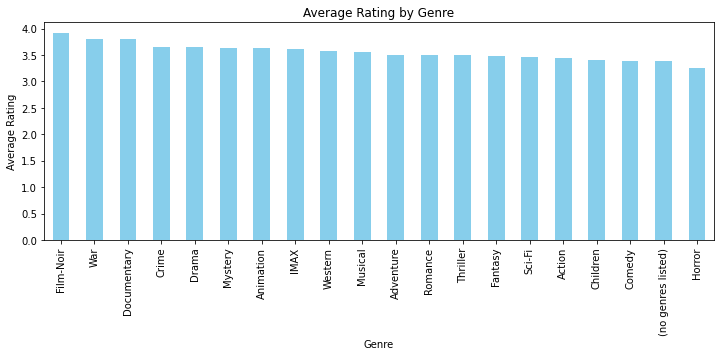

In [187]:
genre_ratings = merged_movie_rating.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Plot the top-rated genres
plt.figure(figsize=(12, 4))
genre_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

In [188]:
genre_ratings.describe()

count    20.000000
mean      3.560346
std       0.161471
min       3.258195
25%       3.453882
50%       3.536144
75%       3.638387
max       3.920115
Name: rating, dtype: float64

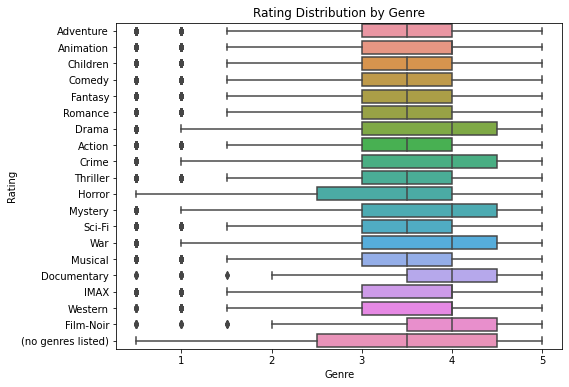

In [189]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='genres', data=merged_movie_rating)
plt.title('Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

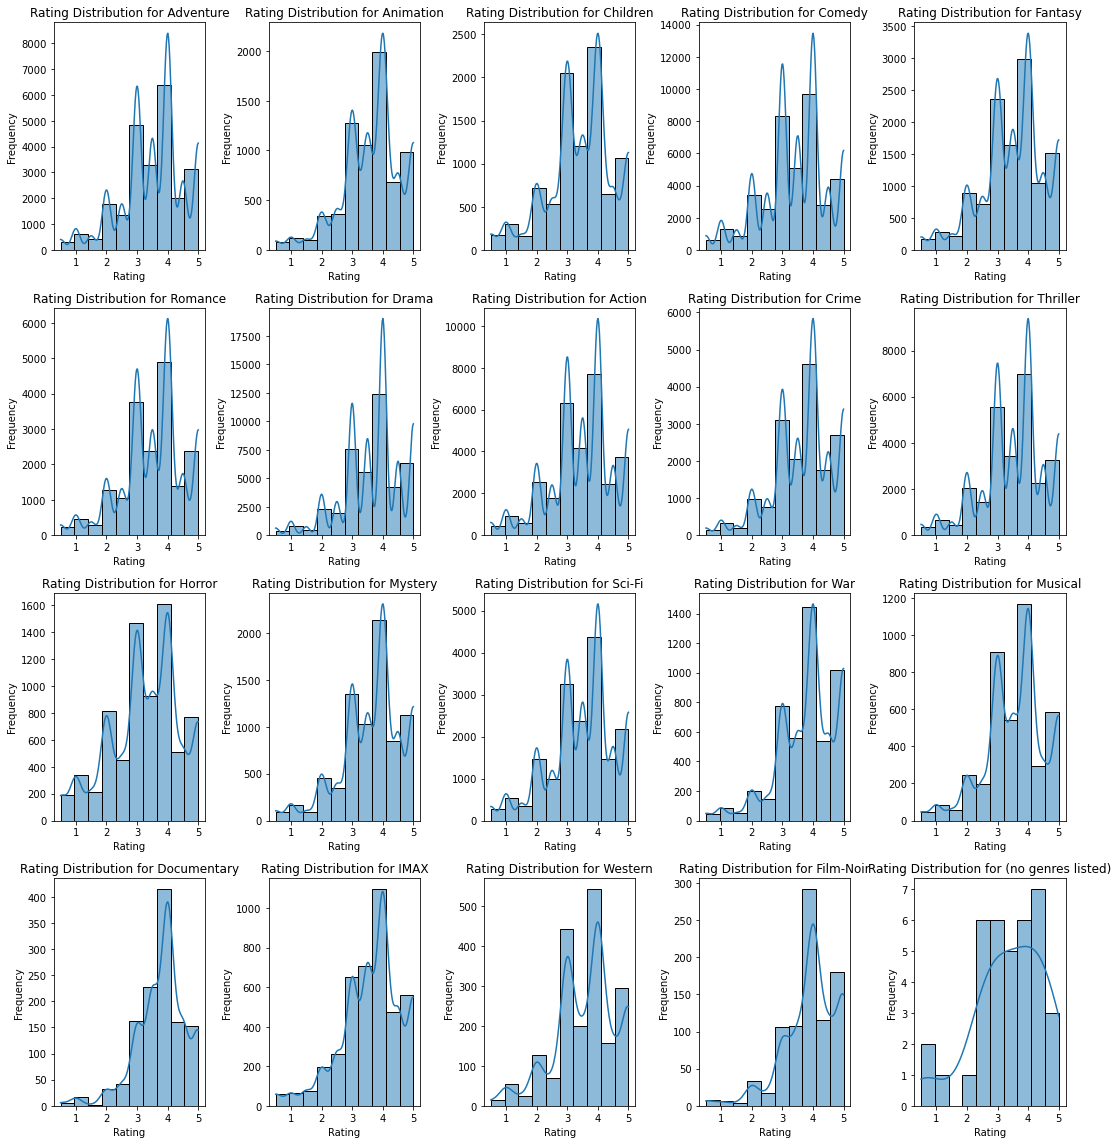

In [190]:
genres = merged_movie_rating['genres'].unique()

num_genres = len(genres)
cols = 5
rows = (num_genres // cols) + (num_genres % cols > 0)

plt.figure(figsize=(15, 4 * rows))

# Create a subplot for each genre
for i, genre in enumerate(genres, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(merged_movie_rating[merged_movie_rating['genres'] == genre]['rating'], bins=10, kde=True)
    plt.title(f'Rating Distribution for {genre}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

_______________

In [191]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


## TAGS

In [192]:
merged_movie_rating_tag = pd.merge(merged_movie_rating, tags, on=['movieId'], how='left')

In [193]:
merged_movie_rating_tag['tag'].isna().sum()

139856

In [194]:
merged_movie_rating_tag = merged_movie_rating_tag.dropna(subset=['tag'])

In [195]:
merged_movie_rating_tag['tag'].isna().sum()

0

In [295]:
merged_movie_rating_tag['movieId'].value_counts()

296      222268
2959      47088
79132     26026
260       19578
293       18620
          ...  
8463          1
34359         1
6390          1
5875          1
8188          1
Name: movieId, Length: 1553, dtype: int64

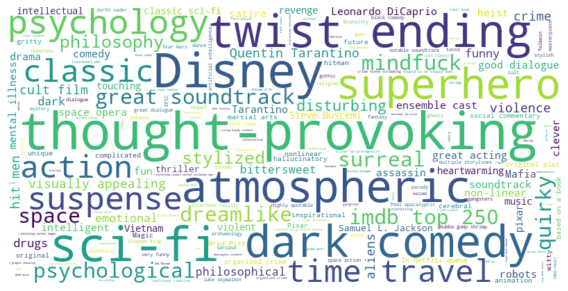

In [197]:
from wordcloud import WordCloud

# Count the frequency of each tag
tag_counts = merged_movie_rating_tag['tag'].value_counts()

# Generate a dictionary of tag frequencies
tag_frequencies = {tag: count for tag, count in tag_counts.items()}

# Create a WordCloud instance
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_frequencies)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

plt.show()

## Redommendation system modeling - Collaborative Filtering

Collaborative filtering is a technique used in recommendation systems to make predictions about the interests of a user by collecting preferences or taste information from many users. The underlying assumption of collaborative filtering is that if users agreed on past items, they will agree again in the future.

For modeling, we will use the Surprise library because it makes building recommendation systems easy and is great for working with collaborative filtering techniques. We chose Surprise for its simplicity, efficiency, and comprehensive tools for evaluating and comparing different recommendation algorithms. It excels at handling user-item interactions and making recommendations based on user and item similarities.

For collaborative filtering we will use:
* KNNBasic: A basic implementation of the k-nearest neighbors algorithm.
* KNNBaseline: A k-nearest neighbors algorithm with a baseline rating to account for user and item biases.
* Matrix factorization based algoritms: SVD (Singular Value Decomposition) - matrix factorization technique that decomposes the user-item interaction matrix into latent factors.

After assesing initial models we will do grid search to find out the best hyperparameters.

But first, I will convert our dataset into something that the surprise library can understand.

As our main **evaluation metric** for this problem, we will use **RMSE and MAE**. For both of these metrics, lower number means better the accuracy. The errors will be scaled same as our metric (rating) on a scale from 0 to 5.

* Root Mean Square Error(RMSE) computes the mean value of all the differences squared between the true and the predicted ratings and then proceeds to calculate the square root out of the result. Lower RMSE indicates that the model's predictions are close to the actual data points.

* Mean Absolute Error (MAE) computes the average of the absolute differences between the true and predicted ratings. It measures the average magnitude of errors in a set of predictions, without considering their direction. Lower MAE indicates that the model's predictions are close to the actual ratings, providing a straightforward measure of prediction accuracy. MAE treats all errors equally by not squaring them, making it less sensitive to outliers. 

In [198]:
merged_movie_rating.columns

Index(['movieId', 'title', 'genres', 'year', 'userId', 'rating', 'rate_year'], dtype='object')

In [199]:
df = merged_movie_rating.copy()

As we start we will only leave the most essential data for collaborative filter prediction - userid, movie title and rating. As a result we have 274453 rows × 3 columns.

In [200]:
df = df[['userId', 'title', 'rating']]

In [201]:
df

,userId,title,rating
0,1.0,Toy Story,4.0
1,5.0,Toy Story,4.0
2,7.0,Toy Story,4.5
3,15.0,Toy Story,2.5
4,17.0,Toy Story,4.5
...,...,...,...
274513,184.0,No Game No Life: Zero,3.5
274514,184.0,Flint,3.5
274515,184.0,Bungo Stray Dogs: Dead Apple,3.5
274516,184.0,Bungo Stray Dogs: Dead Apple,3.5


In [202]:
#For hyperparametr tuning we used this line of code to run the code faster and test. we leave it here just in case
#small_df = df.sample(frac=0.2, random_state=42)

In order to use Surprose library, we need to format our df accordingly, using libraries we imported earlier.

In [203]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df,reader)

In [204]:
#splitting data to train and test subsets
trainset, testset = train_test_split(data, test_size=.2,random_state =42)

In [205]:
results_models = []

## Baseline Model - KNN Basic (User based)

For our movie recommendation system, we have selected KNN Basic as our baseline model. Its simple, effective and can be used for both user based and item based filtering.

In [206]:
#lets do our first iteration with user based filtering and cosine similarity
sim_options = {'name': 'cosine', 'user_based': True}
knn_basic = KNNBasic(sim_options=sim_options, n_jobs=-1)

In [207]:
#fitting the model on train set
knn_basic.fit(trainset)

#making predictions using test set
predictions_basic = knn_basic.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [208]:
#evaluating accuracy with rmse and mae metrics
rmse_knn_basic = accuracy.rmse(predictions_basic)
mae_knn_basic = accuracy.mae(predictions_basic)

RMSE: 0.8513
MAE:  0.6454


In [209]:
s = {"name":'KNN Basic','RMSE': f"{rmse_knn_basic:.2f}", 'MAE': f"{mae_knn_basic:.2f}"}

results_models.append(s)
results_models

[{'name': 'KNN Basic', 'RMSE': '0.85', 'MAE': '0.65'}]

Performance of our KNN Basic model:

* RMSE (Root Mean Square Error): 0.8513
* MAE (Mean Absolute Error): 0.6454

These metrics indicate that, on average, the predicted ratings are approximately 0.85 units away from the actual ratings when using the RMSE metric, and 0.65 units away using the MAE metric. The relatively low values of RMSE and MAE suggest that the KNN Basic model provides reasonably accurate recommendations. Let's see how can we impore accuracy for our recommendations.

## Model 1 - KNN Baseline (User based)

Next, we will evaluate the KNN Baseline model. KNN Baseline extends the basic KNN approach by incorporating baseline estimates to account for user and item biases. This helps improve recommendation accuracy by adjusting for systematic differences in user rating behavior and item popularity, leading to more reliable predictions. 

In [210]:
#fit a model using same sim_options
knn_baseline = KNNBaseline(sim_options=sim_options, n_jobs=-1)

#fitting the model on train set
knn_baseline.fit(trainset)

#making predictions using test set
predictions_baseline = knn_baseline.test(testset)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [211]:
#evaluatting performance
rmse_knn_baseline = accuracy.rmse(predictions_baseline)
mae_knn_baseline = accuracy.mae(predictions_baseline)

RMSE: 0.7487
MAE:  0.5633


In [212]:
s = {"name":'KNN Baseline','RMSE': f"{rmse_knn_baseline:.2f}", 'MAE': f"{mae_knn_baseline:.2f}"}

results_models.append(s)

Performance of our KNN Baseline model:
* RMSE (Root Mean Square Error): 0.7487
* MAE (Mean Absolute Error): 0.5633

We see an improvement from our baseline model. Both errors declined by about 0.1. That's a good result.

## Model 1 - KNN Baseline hyperparametr tuning

For tuning the KNN Baseline model, we will use GridSearchCV to find the optimal hyperparameters. The key parameters to tune include the number of neighbors (k), the similarity measure (sim_options), and baseline estimates (bsl_options).

In [213]:
param_grid = {
    'k': [10, 20, 30, 40, 50],
    'sim_options.name': ['pearson', 'cosine', 'msd'],
    'sim_options.user_based': [False, True],
    'bsl_options.method': ['als', 'sgd'],
    'bsl_options.reg': [10, 20, 30]
}

#setting up the GridSearchCV
gs_knn_baseline = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)

#fit the grid search to the data
gs_knn_baseline.fit(data)

In [214]:
print(gs_knn_baseline.best_score)
print(gs_knn_baseline.best_params)

{'rmse': 0.5949193196279121, 'mae': 0.43452039334474674}
{'rmse': {'k': 10, 'sim_options.name': 'pearson', 'sim_options.user_based': False, 'bsl_options.method': 'als', 'bsl_options.reg': 10}, 'mae': {'k': 10, 'sim_options.name': 'pearson', 'sim_options.user_based': False, 'bsl_options.method': 'als', 'bsl_options.reg': 10}}


**Hyperparameter Tuning Results**:KNN Baseline model tuning performance metrics:

* best RMSE: 0.5957
* best MAE: 0.4349
    
**Optimal Hyperparameters:**
* k (Number of Neighbors): 10
* Similarity Measure: Pearson correlation (Item-based)
* Baseline Method: ALS with regularization (reg) of 10
    
The model achieves good accuracy with 10 neighbors and Pearson correlation for item-based filtering. 
Using ALS for baseline estimates effectively adjusts for biases, resulting in reliable predictions.

## Model 1 - KNN Baseline tuned (Item based)

Lets now run updates model with new parameters, main parameter change worth noticing is that the new model will be Item based. Item based collaborative filtering finds similarities between items (movies) and recommends items similar to those a user has liked. It focuses on the relationships between items rather than users.

In [215]:
#lets fit the model with the above parameters
sim_options = {
    'name': 'pearson',
    'user_based': False
}
bsl_options = {
    'method': 'als',
    'reg': 10
}

knn_baseline_tuned = KNNBaseline(k=10, sim_options=sim_options, bsl_options=bsl_options, n_jobs=-1)

# Fit the model to the training data
knn_baseline_tuned.fit(trainset)

# Predict ratings for the test set
knn_baseline_tuned_predictions = knn_baseline_tuned.test(testset)

# Calculate and print RMSE and MAE
rmse_knn_baseline_tuned = accuracy.rmse(knn_baseline_tuned_predictions)
mae_knn_baseline_tuned = accuracy.mae(knn_baseline_tuned_predictions)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6022
MAE:  0.4454


In [216]:
s = {"name":'KNN Baseline Tuned','RMSE': f"{rmse_knn_baseline_tuned:.2f}", 'MAE': f"{mae_knn_baseline_tuned:.2f}"}

results_models.append(s)

In [217]:
results_models

[{'name': 'KNN Basic', 'RMSE': '0.85', 'MAE': '0.65'},
 {'name': 'KNN Baseline', 'RMSE': '0.75', 'MAE': '0.56'},
 {'name': 'KNN Baseline Tuned', 'RMSE': '0.60', 'MAE': '0.45'}]

Tuned KNN Baseline model achieved the following performance metrics:

* RMSE: 0.6022
* MAE: 0.4454

These results indicate that the model's predictions are, on average, 0.60 units away from the actual ratings for RMSE and 0.45 units for MAE. This demonstrates that the KNN Baseline model provides accurate and reliable movie recommendations.

## Model 2 - Matrix Factorisation SVD

In [218]:
param_grid = {
    'n_factors': [20, 50, 100],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.2]
}

gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
gs_svd.fit(data)

In [219]:
print("Best Parameters for SVD:", gs_svd.best_params['rmse'])

Best Parameters for SVD: {'n_factors': 100, 'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.02}


In [220]:
print(gs_svd.best_score)
print(gs_svd.best_params)

{'rmse': 0.37797456227381565, 'mae': 0.22724897296165453}
{'rmse': {'n_factors': 100, 'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.02}, 'mae': {'n_factors': 100, 'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.02}}


In [221]:
best_svd = gs_svd.best_estimator['rmse']

best_svd.fit(trainset)

# Predict ratings for the test set
svd_predictions = best_svd.test(testset)

# Calculate and print RMSE and MAE
svd_rmse = accuracy.rmse(svd_predictions)
svd_mae = accuracy.mae(svd_predictions)
print(f'SVD Model RMSE: {svd_rmse}')
print(f'SVD Model MAE: {svd_mae}')

RMSE: 0.3703
MAE:  0.2249
SVD Model RMSE: 0.3703292644939009
SVD Model MAE: 0.22485387284188124


In [222]:
s = {"name":'SVD','RMSE': f"{svd_rmse:.2f}", 'MAE': f"{svd_mae:.2f}"}

results_models.append(s)
results_models

[{'name': 'KNN Basic', 'RMSE': '0.85', 'MAE': '0.65'},
 {'name': 'KNN Baseline', 'RMSE': '0.75', 'MAE': '0.56'},
 {'name': 'KNN Baseline Tuned', 'RMSE': '0.60', 'MAE': '0.45'},
 {'name': 'SVD', 'RMSE': '0.37', 'MAE': '0.22'}]

## Model 3 - Alternative Least Squares (ALS)

Alternating Least Squares (ALS) is a matrix factorization algorithm commonly used in collaborative filtering for recommendation systems. It decomposes the user-item interaction matrix into two lower-dimensional matrices: one representing users and the other representing items. The algorithm alternates between fixing one matrix and solving for the other using least squares optimization. This iterative process minimizes the error between the predicted and actual ratings, efficiently handling large, sparse datasets to generate personalized recommendations. 

In [224]:
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

for_spark_df = merged_movie_rating.copy()

# Initialize Spark session
spark = SparkSession.builder.appName("ALSExample").getOrCreate()

spark_df = spark.createDataFrame(for_spark_df)

# Split the data into training and testing sets
(trainset, testset) = spark_df.randomSplit([0.8, 0.2], seed=19)

In [225]:
# Build ALS model
als = ALS(maxIter=10, regParam=0.1, userCol="userId", itemCol="movieId", ratingCol="rating", coldStartStrategy="drop")

# Fit the model
model = als.fit(trainset)

# Make predictions
als_predictions = model.transform(testset)

# Evaluate the model
rmse_evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
als_rmse = rmse_evaluator.evaluate(als_predictions)
print(f"RMSE = {als_rmse}")

mae_evaluator = RegressionEvaluator(metricName="mae", labelCol="rating", predictionCol="prediction")
als_mae = mae_evaluator.evaluate(als_predictions)
print(f"MAE = {als_mae}")

# Stop Spark session
spark.stop()


RMSE = 0.6780850090953123
MAE = 0.5146981951535887


In [226]:
s = {"name":'ALS','RMSE': f"{als_rmse:.2f}", 'MAE': f"{als_mae:.2f}"}

results_models.append(s)
results_models

[{'name': 'KNN Basic', 'RMSE': '0.85', 'MAE': '0.65'},
 {'name': 'KNN Baseline', 'RMSE': '0.75', 'MAE': '0.56'},
 {'name': 'KNN Baseline Tuned', 'RMSE': '0.60', 'MAE': '0.45'},
 {'name': 'SVD', 'RMSE': '0.37', 'MAE': '0.22'},
 {'name': 'ALS', 'RMSE': '0.68', 'MAE': '0.51'}]

# Redommendation system modeling - Content Filtering

In [227]:
df_content = merged_movie_rating_tag.copy()

In [228]:
df_content

,movieId,title,genres,year,userId_x,rating,rate_year,userId_y,tag,timestamp
0,1,Toy Story,Adventure,1995,1.0,4.0,2000.0,336.0,pixar,1.139046e+09
1,1,Toy Story,Adventure,1995,1.0,4.0,2000.0,474.0,pixar,1.137207e+09
2,1,Toy Story,Adventure,1995,1.0,4.0,2000.0,567.0,fun,1.525286e+09
3,1,Toy Story,Adventure,1995,5.0,4.0,1996.0,336.0,pixar,1.139046e+09
4,1,Toy Story,Adventure,1995,5.0,4.0,1996.0,474.0,pixar,1.137207e+09
...,...,...,...,...,...,...,...,...,...,...
905102,193565,Gintama: The Movie,Comedy,2010,184.0,3.5,2018.0,184.0,remaster,1.537099e+09
905103,193565,Gintama: The Movie,Sci-Fi,2010,184.0,3.5,2018.0,184.0,anime,1.537099e+09
905104,193565,Gintama: The Movie,Sci-Fi,2010,184.0,3.5,2018.0,184.0,comedy,1.537099e+09
905105,193565,Gintama: The Movie,Sci-Fi,2010,184.0,3.5,2018.0,184.0,gintama,1.537099e+09


In [229]:
# Combine title and genres for feature extraction
df_content['content'] = df_content['title'] + ' ' + df_content['genres'] + ' ' + df_content['tag'].astype(str)

In [230]:
df_content = df_content.drop_duplicates(subset=['title']).reset_index(drop=True)

In [231]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_content['content'])

# Print the shape of the TF-IDF matrix
print(tfidf_matrix.shape)

(1543, 2879)


In [232]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=11, metric='cosine', algorithm='brute', n_jobs=-1)
nn.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=11)

# Testing content filtering predictions

In [233]:
def get_movie_recommendations(movie_title, n_movies_to_recommend=10):
    # Check if the movie title exists in the DataFrame
    movie_list = df_content[df_content['title'].str.contains(movie_title, case=False, na=False)]
    if not movie_list.empty:
        # Get the index of the movie that matches the title
        idx = movie_list.index[0]

        # Find the indices of the n most similar movies
        distances, indices = nn.kneighbors(tfidf_matrix[idx], n_neighbors=n_movies_to_recommend+1)

        # Ensure indices are within the range of the DataFrame
        valid_indices = [i for i in indices.flatten() if i < len(df_content)]
        
        # Skip the first index as it is the input movie itself
        movie_indices = valid_indices[1:n_movies_to_recommend+1]

        # Return the top n most similar movies
        return df_content[['title', 'genres', 'year']].iloc[movie_indices].drop_duplicates()
    else:
        return "No movies found. Please check your input"

In [300]:
# Example usage
print(get_movie_recommendations('Shrek'))

                                     title     genres  year
1206                        Into the Woods  Adventure  1991
1191                               Shrek 2  Adventure  2004
1484                            Wild Tales     Comedy  2014
1400                                    Up  Adventure  2009
1463  Hobbit: The Desolation of Smaug, The  Adventure  2013
831       Bill & Ted's Excellent Adventure  Adventure  1989
1451                           Croods, The  Adventure  2013
1417                                Sintel  Animation  2010
988                                  Holes  Adventure  2003
142                                Aladdin  Adventure  1992


In [301]:
shrek_rows = merged_movie_rating_tag[merged_movie_rating_tag['title'] == 'Shrek']
shrek_rows['tag'].value_counts()

fairy tales    1020
Name: tag, dtype: int64

In [298]:
print(get_movie_recommendations('Titanic'))

                    title       genres  year
984   Ghosts of the Abyss  Documentary  2003
901                     Z        Drama  1969
1341     Illusionist, The        Drama  2006
1317        North Country        Drama  2005
949                   May        Drama  2002
667              Magnolia        Drama  1999
71              My Family        Drama  1995
715               My Life        Drama  1993
1051   My Life Without Me        Drama  2003
1366  There Will Be Blood        Drama  2007


In [270]:
titanic_rows = merged_movie_rating_tag[merged_movie_rating_tag['title'] == 'Titanic']
titanic_rows['tag'].value_counts()

romance      280
shipwreck    280
Name: tag, dtype: int64

## Testing Collaborative Filtering Predictions

In [235]:
def get_user_recommendations(user_id, n_movies_to_recommend=10):
    # Get the list of all movie IDs
    all_movie_ids = df['title'].unique()
    
    # Get the list of movie IDs the user has already rated
    user_rated_movie_ids = df[df['userId'] == user_id]['title'].unique()
    
    # Find movie IDs the user has not rated
    movie_ids_to_predict = [movie_id for movie_id in all_movie_ids if movie_id not in user_rated_movie_ids]
    
    # Predict ratings for the movies the user has not rated
    predictions = []
    for movie_id in movie_ids_to_predict:
        pred = knn_baseline_tuned.predict(user_id, movie_id)
        predictions.append((movie_id, pred.est))
    
    # Sort the predictions by estimated rating in descending order
    predictions.sort(key=lambda x: x[1], reverse=True)
    
    # Get the top N recommended movies
    top_n_predictions = predictions[:n_movies_to_recommend]
    
    # Create a DataFrame for the recommended movies
    recommend_frame = [{'Title': movie_id, 'Predicted Rating': rating} for movie_id, rating in top_n_predictions]
    df_recommendations = pd.DataFrame(recommend_frame, index=range(1, len(recommend_frame) + 1))
    
    return df_recommendations


In [236]:
print(get_user_recommendations(5000))

                                                Title  Predicted Rating
1                                  Lawrence of Arabia          4.417586
2                           Shawshank Redemption, The          4.415148
3      Man Bites Dog (C'est arrivé près de chez vous)          4.397904
4   Dr. Strangelove or: How I Learned to Stop Worr...          4.391381
5   Neon Genesis Evangelion: The End of Evangelion...          4.350430
6                                         Rear Window          4.340524
7                                          Fight Club          4.340259
8                                       Touch of Evil          4.335914
9                              Day of the Doctor, The          4.314010
10                                Princess Bride, The          4.313049


In [237]:
def get_similar_movie_recommendations(movie_name, n_movies_to_recommend=10):
    # Find the movie in the dataset
    movie_list = df[df['title'].str.contains(movie_name, case=False, na=False)]
    
    if not movie_list.empty:
        # Get the movie ID
        movie_id = movie_list.iloc[0]['title']
        
        # Get the list of all movie IDs
        all_movie_ids = df['title'].unique()
        
        # Predict ratings for all movies for a hypothetical user who rates the input movie highly
        hypothetical_user_id = df['userId'].max() + 1  # Use a new user ID to avoid conflicts
        predictions = []
        for other_movie_id in all_movie_ids:
            if other_movie_id != movie_id:  # Skip the input movie itself
                pred = knn_baseline_tuned.predict(hypothetical_user_id, other_movie_id)
                predictions.append((other_movie_id, pred.est))
        
        # Sort the predictions by estimated rating in descending order
        predictions.sort(key=lambda x: x[1], reverse=True)
        
        # Get the top N recommended movies
        top_n_predictions = predictions[:n_movies_to_recommend]
        
        # Create a DataFrame for the recommended movies
        recommend_frame = [{'Title': movie_id} for movie_id, rating in top_n_predictions]
        df_recommendations = pd.DataFrame(recommend_frame, index=range(1, len(recommend_frame) + 1))
        
        return df_recommendations
    else:
        return "No movies found. Please check your input"

In [238]:
print(get_similar_movie_recommendations('Shrek'))

                                                Title
1                                  Lawrence of Arabia
2                           Shawshank Redemption, The
3      Man Bites Dog (C'est arrivé près de chez vous)
4   Dr. Strangelove or: How I Learned to Stop Worr...
5   Neon Genesis Evangelion: The End of Evangelion...
6                                         Rear Window
7                                          Fight Club
8                                       Touch of Evil
9                              Day of the Doctor, The
10                                Princess Bride, The


# Cold start Problem

The cold start problem in recommendation systems occurs when there is insufficient data to make reliable recommendations for new users or new items.

1. What we can do for **new users** is try collect Initial Data. This can be done with onboarding Surveys after the user signs up. We can ask new users to rate a few items or indicate their genre preferences.  

For users that skiped the survey we can recommend most popular (high average rating and high number of ratings) movies. We can then collect data of how they interact with shown movies.

For user that specified their preferred genres we can recommend most popular and recently released movies among selected genres.

2. For **new items** we can use content-Based filtering. After the movie is added we can create metadata on the movie. After we will recommend the new item to users who have shown interest in similar items based on attributes (e.g., genre, tags, description).

In [239]:
cold_df = merged_movie_rating

In [240]:
cold_df

,movieId,title,genres,year,userId,rating,rate_year
0,1,Toy Story,Adventure,1995,1.0,4.0,2000.0
1,1,Toy Story,Adventure,1995,5.0,4.0,1996.0
2,1,Toy Story,Adventure,1995,7.0,4.5,2005.0
3,1,Toy Story,Adventure,1995,15.0,2.5,2017.0
4,1,Toy Story,Adventure,1995,17.0,4.5,2011.0
...,...,...,...,...,...,...,...
274513,193583,No Game No Life: Zero,Fantasy,2017,184.0,3.5,2018.0
274514,193585,Flint,Drama,2017,184.0,3.5,2018.0
274515,193587,Bungo Stray Dogs: Dead Apple,Action,2018,184.0,3.5,2018.0
274516,193587,Bungo Stray Dogs: Dead Apple,Animation,2018,184.0,3.5,2018.0


In [241]:
cold_df = cold_df.groupby('title').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

print(cold_df)

                                   title  average_rating  rating_count
0                                    '71        4.000000             4
1       'Hellboy': The Seeds of Creation        4.000000             5
2                        'Round Midnight        3.500000             4
3                           'Salem's Lot        5.000000             4
4                     'Til There Was You        4.000000             4
...                                  ...             ...           ...
9428                            eXistenZ        3.863636            66
9429                                 xXx        2.770833            72
9430             xXx: State of the Union        2.000000            15
9431                      ¡Three Amigos!        3.134615            52
9432  À nous la liberté (Freedom for Us)        1.000000             2

[9433 rows x 3 columns]


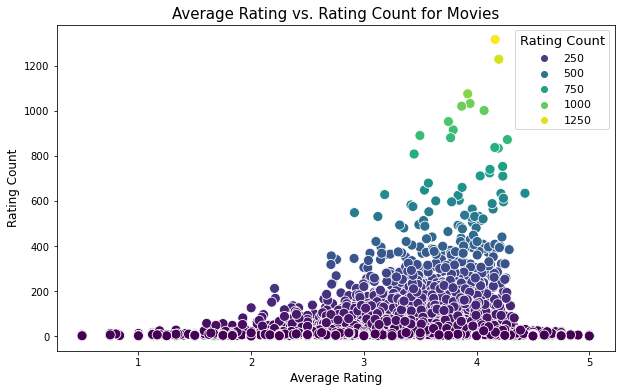

In [242]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=cold_df, x='average_rating', y='rating_count', s=100, hue='rating_count', palette='viridis')

# Adding titles and labels
scatter_plot.set_title('Average Rating vs. Rating Count for Movies', fontsize=15)
scatter_plot.set_xlabel('Average Rating', fontsize=12)
scatter_plot.set_ylabel('Rating Count', fontsize=12)

# Customize legend
scatter_plot.legend(title='Rating Count', title_fontsize='13', fontsize='11', loc='upper right')

In [243]:
min_ratings = 200
filtered_movies = cold_df[cold_df['rating_count'] >= min_ratings]

# Sort movies by average rating and then by count of ratings
sorted_movies = filtered_movies.sort_values(by=['average_rating', 'rating_count'], ascending=[False, False])

# Select the top 5 movies
top_5_movies = sorted_movies.head(5)

print("Top 5 recommended movies:")
print(top_5_movies[['title', 'average_rating', 'rating_count']])

Top 5 recommended movies:
                          title  average_rating  rating_count
7357  Shawshank Redemption, The        4.429022           634
3392             Godfather, The        4.289062           384
2927                 Fight Club        4.272936           872
3393    Godfather: Part II, The        4.259690           258
2264              Departed, The        4.252336           321


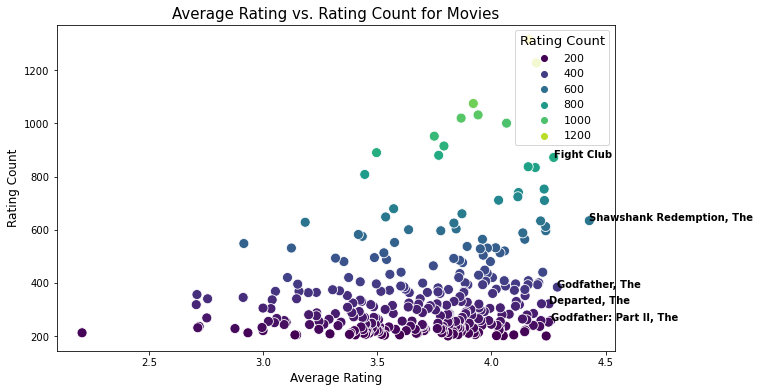

In [244]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=sorted_movies, x='average_rating', y='rating_count', s=100, hue='rating_count', palette='viridis')
scatter_plot.set_title('Average Rating vs. Rating Count for Movies', fontsize=15)
scatter_plot.set_xlabel('Average Rating', fontsize=12)
scatter_plot.set_ylabel('Rating Count', fontsize=12)
scatter_plot.legend(title='Rating Count', title_fontsize='13', fontsize='11', loc='upper right')

# Highlight the top 5 movies
for i in range(len(top_5_movies)):
    scatter_plot.text(top_5_movies.iloc[i].average_rating, top_5_movies.iloc[i].rating_count, top_5_movies.iloc[i].title,
                      horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()

# Conslusion

In [245]:
final_scores = pd.DataFrame(results_models)
final_scores

,name,RMSE,MAE
0,KNN Basic,0.85,0.65
1,KNN Baseline,0.75,0.56
2,KNN Baseline Tuned,0.60,0.45
3,SVD,0.37,0.22
4,ALS,0.68,0.51


# Recommendations

Introduce recommendation system based on SVD Matrix Factorisation with tuned hyperparameters

Introduce content based filtering 


# Nest Steps

Collect data and evaluate changes in:
User engagement, viewing time, user retention, ads revenue

Introduce users demographic data

Collect user feedback to provided recommendations

Develop hybrid model
